# <h1 align="center"> © RsydMathTech. <h1/>

# SLR vs MLR vs PLR

## 1. Simple Linear Regression (SLR, = 1 feature)
- **Ciri data:**
  - Hanya **1 fitur (independent variable)**  
  - Hubungan **linear** dengan target  
  - Contoh: Tinggi tanaman vs jumlah pupuk
- **Model:**
$$
y = \beta_0 + \beta_1 x + \epsilon
$$
- **Prediksi:** mudah, satu garis lurus

---

## 2. Multiple Linear Regression ((MLR, >1 feature))
- **Ciri data:**
  - Lebih dari **1 fitur (multi-variable)**  
  - Hubungan **linear** dengan target  
  - Contoh: Tinggi tanaman dipengaruhi **pupuk, cahaya, dan air**
- **Model:**
$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n + \epsilon
$$
- **Prediksi:** tetap linear, tapi lebih kompleks karena banyak variabel

---

## 3. Polynomial Regression (PLR, degree=2)
- **Ciri data:**
  - Bisa **1 fitur atau multi-fitur**  
  - Hubungan dengan target **tidak linear**, ada kurva/lengkungan  
  - Contoh: Tinggi tanaman vs jumlah pupuk yang naiknya parabola  
- **Model:**
$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \dots + \beta_n x^n + \epsilon
$$
- **Prediksi:** kurva (bisa quadratic, cubic, atau higher order)  
- Masih **linear terhadap parameter \(\beta\)** → bisa pakai LinearRegression

---

## **Ringkasan Beda Utama**
| Tipe | Fitur | Hubungan dengan target | Bentuk Prediksi |
|------|-------|----------------------|----------------|
| SLR  | 1     | Linear               | Garis lurus    |
| MLR  | >1    | Linear               | Hyperplane linear |
| PLR  | 1 atau >1 | Non-linear          | Kurva polynomial |


### Import

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style="whitegrid")
np.random.seed(42)

# 1. Simple Linear Regression Data
X_slr = np.linspace(1, 50, 50).reshape(-1,1)
y_slr = 3*X_slr.flatten() + np.random.normal(0, 10, 50)  # linear + noise

# 2. Multiple Linear Regression Data (2 fitur)
X1 = np.linspace(1, 50, 50)
X2 = np.linspace(10, 100, 50)
noise = np.random.normal(0, 10, 50)
y_mlr = 2*X1 + 3*X2 + noise
X_mlr = np.column_stack([X1, X2])

# 3. Polynomial Linear Regression Data (1 fitur non-linear)
X_plr = np.linspace(1, 20, 50).reshape(-1,1)
y_plr = 0.5*X_plr.flatten()**2 + 2*X_plr.flatten() + np.random.normal(0,5,50)

# SLR

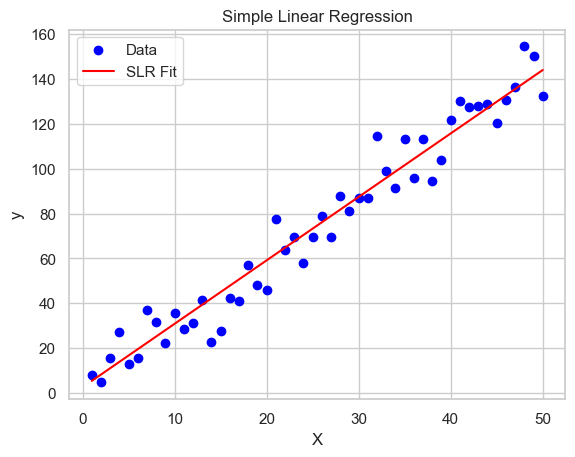

In [43]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X_slr, y_slr, test_size=0.2, random_state=42)

# Model
slr = LinearRegression()
slr.fit(X_train, y_train)
yhat_slr = slr.predict(X_test)

# Plot
plt.scatter(X_slr, y_slr, color="blue", label="Data")
plt.plot(X_slr, slr.predict(X_slr), color="red", label="SLR Fit")
plt.title("Simple Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# MLR

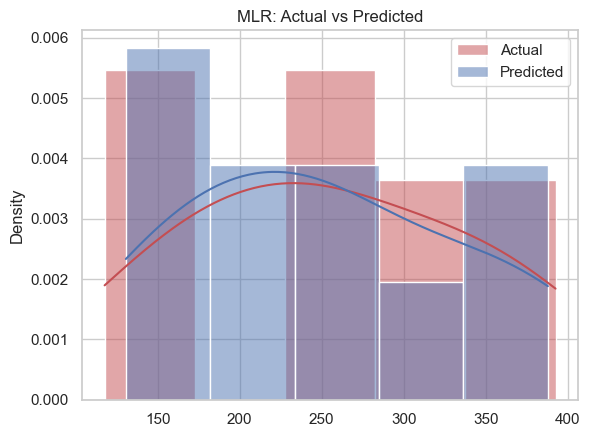

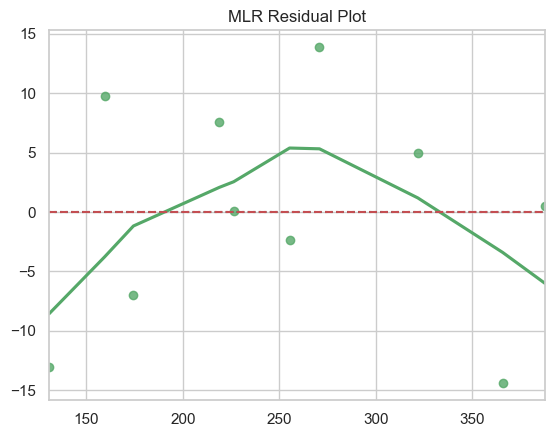

MLR Evaluation:
MSE = 86.12
R²  = 0.99


In [44]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X_mlr, y_mlr, test_size=0.2, random_state=42)

# Model
mlr = LinearRegression()
mlr.fit(X_train, y_train)
yhat_mlr = mlr.predict(X_test)

# Distribution plot
sns.histplot(y_test, color="r", label="Actual", kde=True, stat="density")
sns.histplot(yhat_mlr, color="b", label="Predicted", kde=True, stat="density")
plt.legend()
plt.title("MLR: Actual vs Predicted")
plt.show()

# Residual plot
sns.residplot(x=yhat_mlr, y=y_test - yhat_mlr, lowess=True, color="g")
plt.axhline(0, color="r", linestyle="--")
plt.title("MLR Residual Plot")
plt.show()

# Evaluation
print("MLR Evaluation:")
print(f"MSE = {mean_squared_error(y_test, yhat_mlr):.2f}")
print(f"R²  = {r2_score(y_test, yhat_mlr):.2f}")

### Pipeline Polynomial Regression (Multi-fitur)

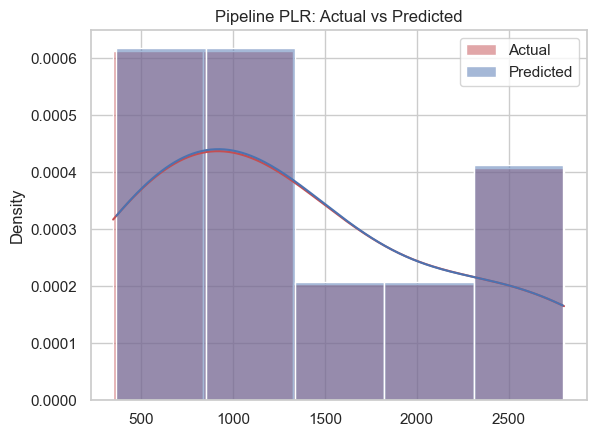

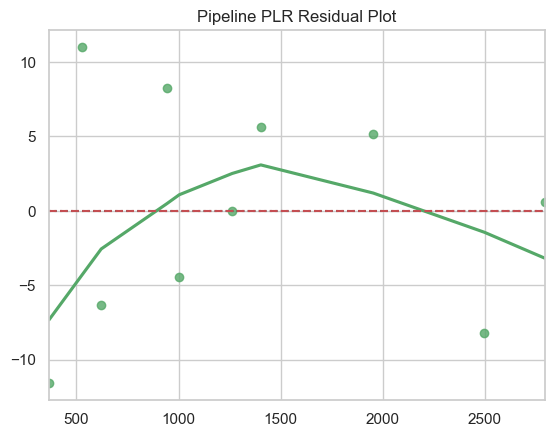

Pipeline Polynomial Linear Regression Evaluation:
MSE = 71.03
R²  = 1.00


In [45]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
np.random.seed(42)

# Dataset multi-fitur buatan
X1 = np.linspace(1, 50, 50)
X2 = np.linspace(10, 100, 50)
noise = np.random.normal(0, 10, 50)
y = 2*X1 + 3*X2 + 0.5*X1*X2 + noise  # ada interaksi biar PLR relevan
X = np.column_stack([X1, X2])

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline
plr_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("lr", LinearRegression())
])

# Train
plr_pipeline.fit(X_train, y_train)

# Predict
yhat = plr_pipeline.predict(X_test)

# Evaluation
# Distribution plot
sns.histplot(y_test, color="r", label="Actual", kde=True, stat="density")
sns.histplot(yhat, color="b", label="Predicted", kde=True, stat="density")
plt.legend()
plt.title("Pipeline PLR: Actual vs Predicted")
plt.show()

# Residual plot
sns.residplot(x=yhat, y=y_test - yhat, lowess=True, color="g")
plt.axhline(0, color="r", linestyle="--")
plt.title("Pipeline PLR Residual Plot")
plt.show()

# Metrics
mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print("Pipeline Polynomial Linear Regression Evaluation:")
print(f"MSE = {mse:.2f}")
print(f"R²  = {r2:.2f}")


# Kesimpulan Regresi: SLR, MLR, PLR Pipeline

---

## 1. Simple Linear Regression (SLR)

### Data
- 50 sampel, 1 fitur (`X_slr`) dan target (`y_slr`)
- Data dibuat linear: $y = 3X + \text{noise}$
- Noise ±10 → sedikit variasi, tren linear tetap jelas

### Model
- **Simple Linear Regression**
- Garis prediksi linear mengikuti pola data

### Analisis Visual
- **Scatter plot**: titik biru → data asli
- **Garis merah**: model linear
- Garis linear cukup pas mengikuti tren data
- Noise minor → beberapa titik menyimpang, tapi tidak signifikan

### Kesimpulan
1. Hubungan linear jelas → SLR memadai
2. Model fit baik → tidak perlu polynomial
3. Noise minor → tidak mengubah tren linear
4. $R^2$ tinggi → model menjelaskan sebagian besar variansi target

**Intinya:** Untuk dataset ini, SLR cukup, tidak perlu MLR atau PLR.

---

## 2. Multiple Linear Regression (MLR)

### Data
- 50 sampel, 2 fitur (`X_1`, `X_2`) dan target (`y_mlr`)
- Data linear: $y = 2X_1 + 3X_2 + \text{noise}$
- Noise ±10 → ada variasi acak, tren linear kedua fitur jelas

### Model
- **Multiple Linear Regression**
- Prediksi target berdasarkan kedua fitur

### Analisis Visual
- **Distribution plot:** prediksi (biru) vs aktual (merah)
- **Residual plot:** error tersebar acak di sekitar nol → model fit baik
- Tidak ada pola sistematis → residual random

### Metrics
- MSE → error rata-rata prediksi
- $R^2$ → seberapa banyak variansi target dijelaskan model

### Kesimpulan
1. Hubungan linear di kedua fitur jelas → MLR efektif
2. Model fit baik → prediksi mengikuti distribusi data
3. Noise minor → residual acak
4. Untuk dataset ini, MLR lebih sesuai dibanding SLR karena ada lebih dari satu fitur

---

## 3. Polynomial Regression (PLR) Pipeline

### Data
- 50 sampel, 2 fitur (`X_1`, `X_2`) dan target:
$y = 2 X_1 + 3 X_2 + 0.5 X_1 X_2 + \text{noise}$
- Ada **interaksi antar fitur** → SLR/MLR biasa tidak cukup
- Noise ±10 → variasi minor

### Model
- **Pipeline:**
  1. `StandardScaler()` → normalisasi fitur
  2. `PolynomialFeatures(degree=2)` → fitur kuadrat & interaksi (`X_1^2`, `X_2^2`, `X_1*X_2`)
  3. `LinearRegression()` → fit model linear terhadap fitur transformasi

### Analisis Visual
- **Distribution plot:** prediksi mengikuti distribusi target dengan baik
- **Residual plot:** error tersebar acak → residual random

### Metrics
- MSE → error prediksi kecil
- $R^2$ → tinggi → model fit baik

### Kesimpulan
1. SLR/MLR biasa **tidak cukup** → ada interaksi antar fitur
2. Pipeline PLR mampu menangkap interaksi & variasi non-linear
3. Prediksi mengikuti distribusi data → residual random
4. $R^2$ tinggi → model menjelaskan sebagian besar variansi target

**Intinya:** Untuk dataset multi-fitur dengan interaksi, **Pipeline Polynomial Regression** lebih cocok daripada SLR/MLR biasa.
